In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame({
    'Sepal length':iris.data[:,0],
    'Sepal width':iris.data[:,1],
    'Petal length':iris.data[:,2],
    'Petal width':iris.data[:,3],
    'class':iris.target
})

In [4]:
iris_data
# iris dataset link: https://github.com/dotnet/machinelearning/blob/main/test/data/iris.txt
# class 0 = Iris-setosa
# class 1 = Iris-versicolor
# calss 2 = Iris-virginica

,Sepal length,Sepal width,Petal length,Petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
fig = plt.figure(figsize=(5,5))
plt.scatter(iris_data['Sepal length'],iris_data['Sepal width'],c=iris.target)

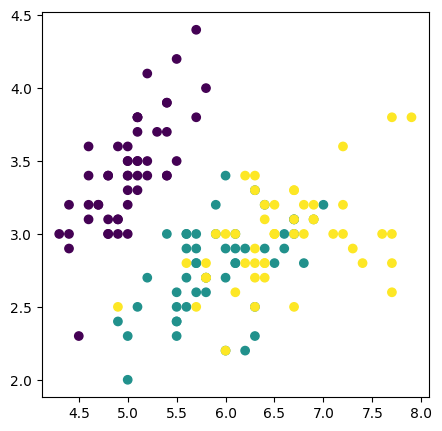

In [6]:
plt.show()

In [7]:
def predict(k : int, attr : str, pair : tuple) -> int:
    """brute force"""
    attr_l, attr_w = iris_data[attr +' length'], iris_data[attr +' width']
    selected_data = np.array([attr_l, attr_w])
    
    def linalg_norm(a : tuple, b : tuple):
        return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** (1/2)
    
    dist = [(linalg_norm(pair, (selected_data[0][i], selected_data[1][i])), i) for i in range(len(selected_data[0]))]
    dist.sort()

    vote_box = [0, 0, 0]
    for _, i in dist[:k]:
        vote_box[int(iris_data.loc[i]['class'])] += 1
    return vote_box.index(max(vote_box))

In [8]:
def show_result(k : int, attr : str, pair : tuple) -> None:
    iris_class = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    pred = predict(k, attr, pair)
    print("The vlass is {}.".format(iris_class[pred]))

    color_plane = ('r', 'g', 'b')
    fig = plt.figure(figsize=(5,5))
    plt.scatter(iris_data[attr + ' length'],iris_data[attr + ' width'], c=[color_plane[c] for c in iris.target])
    plt.scatter(pair[0], pair[1], c=color_plane[pred], marker='X', s=100)
    plt.show()

The vlass is Iris-virginica.


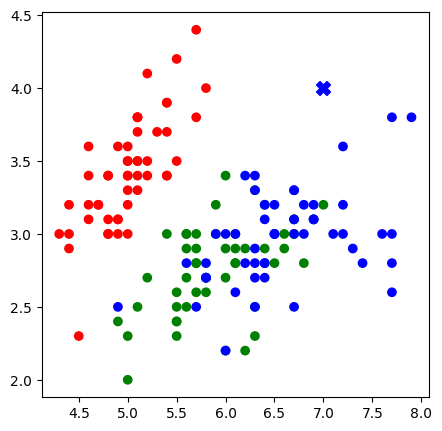

In [9]:
show_result(6, 'Sepal', (7, 4))